In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.manifold import TSNE 

In [ ]:
df1 = pd.read_csv('DataClustering.csv')

In [ ]:
df1.describe()

,x1,x2,x3,x4
count,351.000000,351.000000,351.000000,351.000000
mean,0.278820,0.472738,1.643857,1.482918
std,0.341446,0.511023,1.668052,0.964016
min,0.048604,0.047022,0.367717,0.232562
25%,0.111341,0.115257,0.815180,0.857948
50%,0.153383,0.165684,1.083528,1.190996
75%,0.212564,0.854725,1.557597,1.724461
max,2.037125,2.476118,12.635585,7.726843


We see that the minimum values of each feature are close to 0, so we have to be careful with this while performing a log transform.

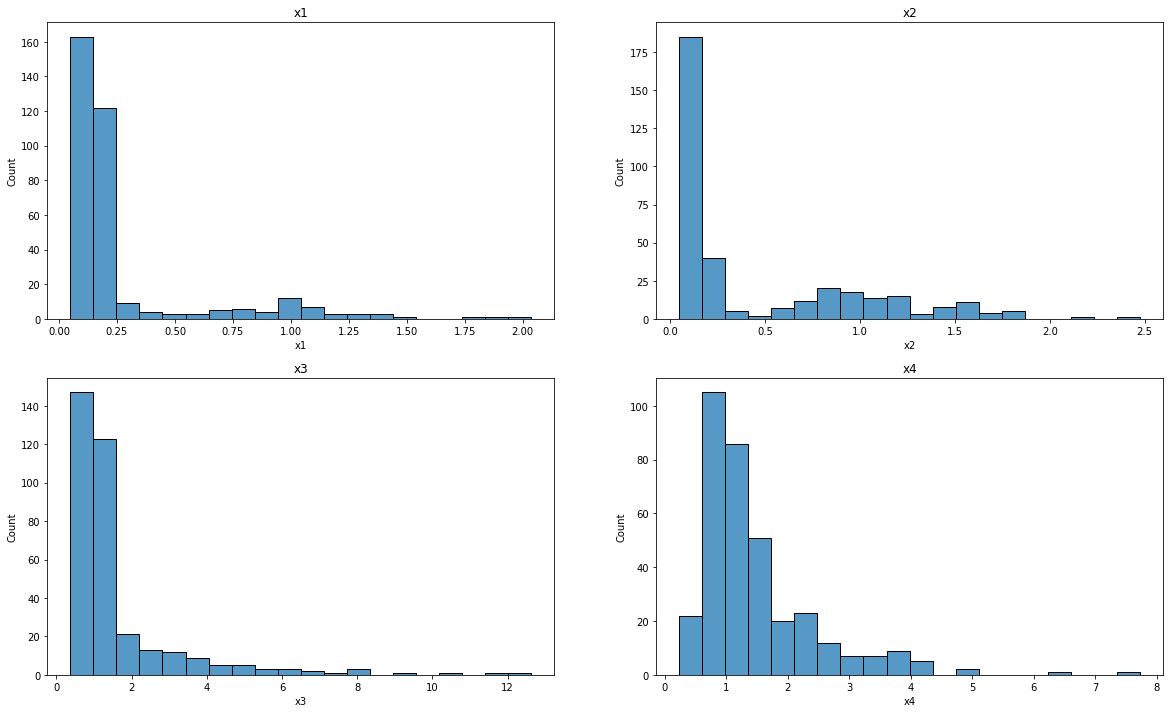

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(221)
sns.histplot(df1.x1,bins=20)
plt.title('x1')

plt.subplot(222)
sns.histplot(df1.x2,bins=20)
plt.title('x2')

plt.subplot(223)
sns.histplot(df1.x3,bins=20)
plt.title('x3')

plt.subplot(224)
sns.histplot(df1.x4,bins=20)
plt.title('x4')

plt.show()

We observe that all 4 features are positively skewed. Features x3 and x4 are slightly bimodal, so we might not be able to change them into a gaussian distribution, but we can reduce skewness.

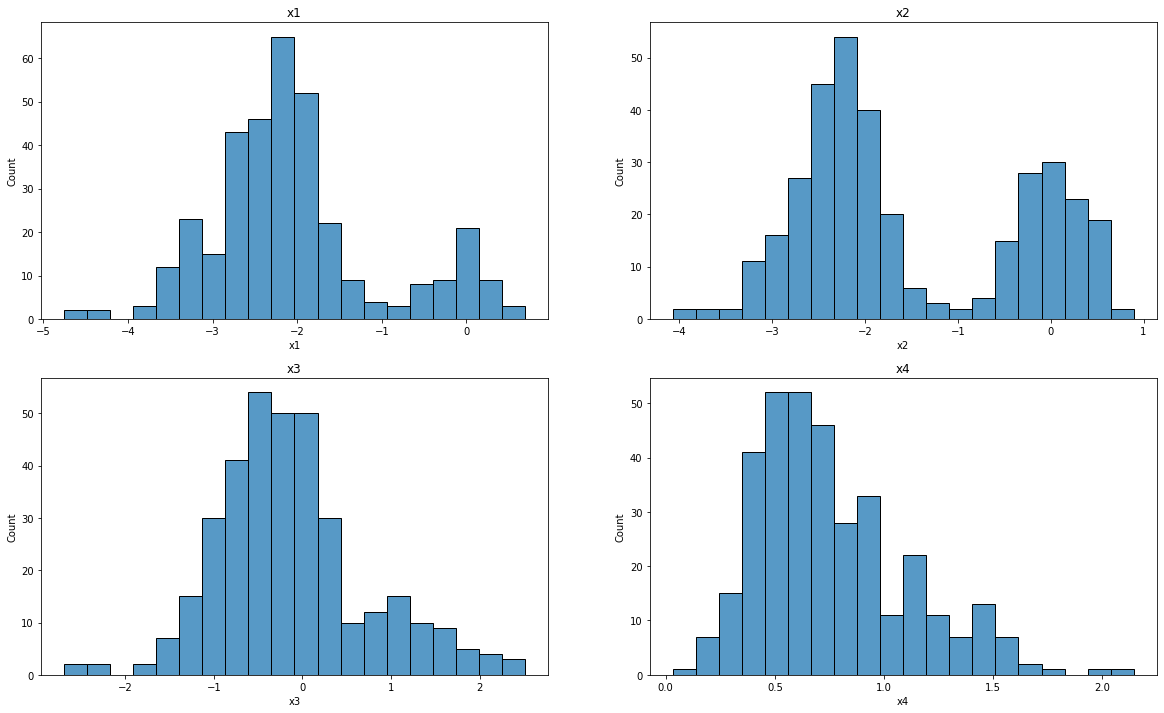

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(221)
sns.histplot(np.log(df1.x1-0.04),bins=20)
plt.title('x1')

plt.subplot(222)
sns.histplot(np.log(df1.x2-0.03),bins=20)
plt.title('x2')

plt.subplot(223)
sns.histplot(np.log(df1.x3-0.3),bins=20)
plt.title('x3')

plt.subplot(224)
sns.histplot(np.log(df1.x4+0.8),bins=20)
plt.title('x4')

plt.show()

In [ ]:
df1['x1']=np.log(df1.x1-0.04)
df1['x2']=np.log(df1.x2-0.03)
df1['x3']=np.log(df1.x3-0.3)
df1['x4']=np.log(df1.x4+0.8)
# Performing the required transforms as seen in transformed histograms

In [ ]:
df1 = (df1 - df1.mean(axis=0))/df1.std(axis=0)

In [ ]:
K = range(3,18)
labb = []
centresb = []
inert = []
for i in K:
    km2 = KMeans(n_clusters = i,random_state=0,max_iter=500)
    km2.fit(df1)
    labb.append(km2.labels_)
    centresb.append(km2.cluster_centers_)
    inert.append(km2.inertia_)
    

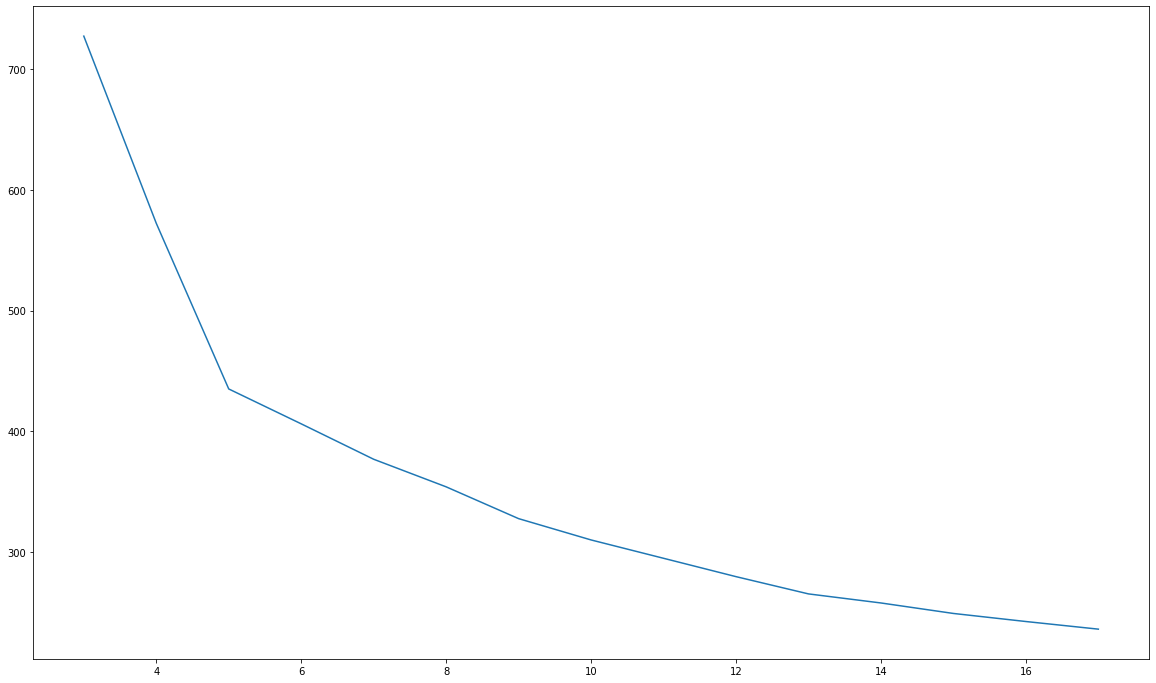

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(range(3,18),inert)
plt.show()

We see a steep drop in slope of inertia vs number of clusters at k=5, hence by elbow method, optimal number of clusters is 5.

In [ ]:
km5 = KMeans(n_clusters = 5,random_state=0,max_iter=500) # Creating a model with optimal number of clusters
km5.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
Xtsne = TSNE(2)
df_tsne = Xtsne.fit_transform(df1)

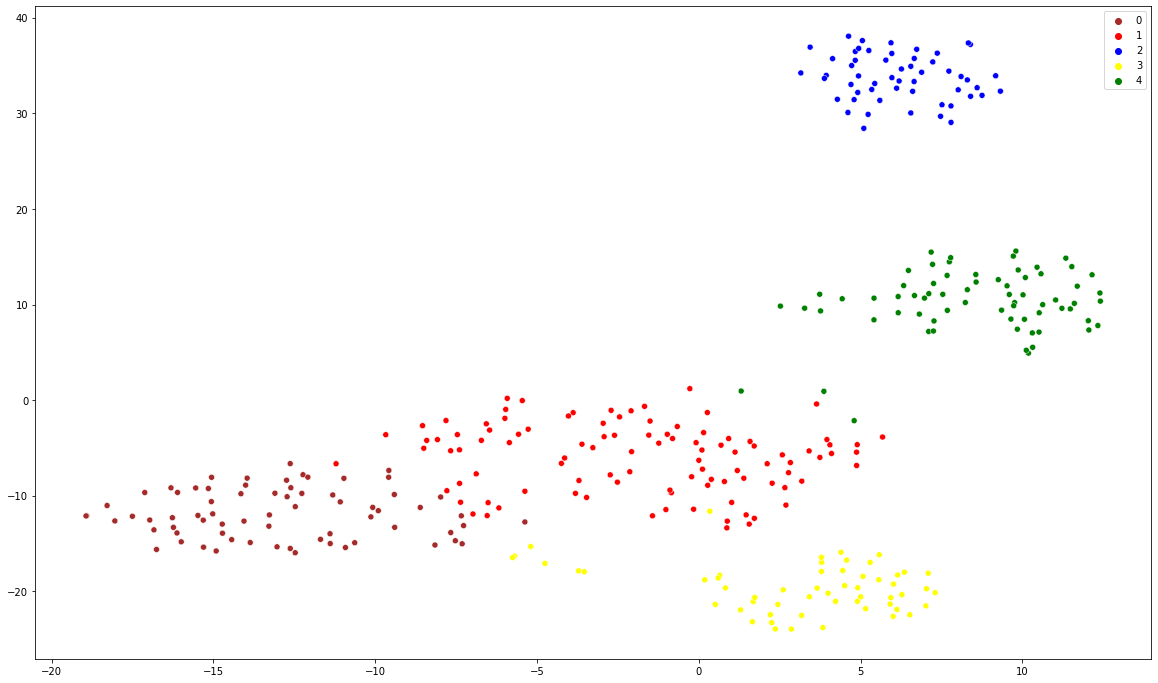

In [ ]:

plt.figure(figsize = (20,12))
sns.scatterplot(x=df_tsne[:,0],y=df_tsne[:,1],hue = km5.labels_,palette=['brown','red','blue','yellow','green'] )
plt.show()

We observe that the clusters in the 2D are contiguous, implying that the t-SNE embedding is accurate. (otherwise we wuld have clusters mixing with each other).
